<h1>PRUEBA TÉCNICA DANIEL MÁRQUEZ</h1><br>

<h2>Técnologías usadas</h2>

- PhpMyAdmin
- MySQL
- Jupyther
- pandas 
- matplotlib

In [4]:
!pip install mysql-connector-python

<h2>Librerias</h2>


In [82]:
import mysql.connector
from decimal import Decimal
import datetime
import pandas as pd
import matplotlib.pyplot as plt

<h2>Configuración de las variables de entorno</h2>

In [24]:
config_clap = {
    
    'user': 'root',
    'password': '',
    'host': 'localhost',
    'database': 'clap',
}

config_bansur = {
    
    'user': 'root',
    'password': '',
    'host': 'localhost',
    'database': 'bprosys',
    
}

<h2>Conección CLAP DB</h2>

In [313]:
conn_clap = mysql.connector.connect(**config_clap)
cursor_clap = conn_clap.cursor()

<h2>Conección BANSUR DB</h2>

In [333]:
conn_bansur = mysql.connector.connect(**config_bansur)
cursor_bansur = conn_bansur.cursor()

<h2> RESPUESTAS PRUEBA TÉCNICA </h2>

<h3>1. Escriba el código de SQL que le permite conocer el monto y la cantidad de las transacciones que SIMETRIK considera como conciliables para la base de CLAP </h3>

Estado general

In [50]:
cursor_clap.execute("SELECT DISTINCT TIPO_TRX FROM clap");
estados = cursor_clap.fetchall()
print(estados)

[('CANCELADA',), ('PAGADA',), ('NO APLICA',)]


Estado conciliación

In [56]:
PAGADO_CLAP = str(estados[1][0])
print(PAGADO_CLAP)

PAGADA


Monto total de transacciones conciliadas

In [93]:
cursor_clap.execute(f"SELECT SUM(MONTO) FROM clap WHERE TIPO_TRX = '{PAGADO_CLAP}'");
monto_conciliado_cp = cursor_clap.fetchall()[0][0]
print(monto_conciliado_cp)

61050819.410


Monto total de transacciones

In [269]:
cursor_clap.execute(f"SELECT SUM(MONTO) FROM clap");
total_general_cp = cursor_clap.fetchall()[0][0]
print(total_general_cp)

73736800.920


Transacciones conciliadas

In [88]:
cursor_clap.execute(f"SELECT COUNT(MONTO) FROM clap WHERE TIPO_TRX = '{PAGADO_CLAP}'");
transacciones_conciliadas_cp = cursor_clap.fetchall()[0][0]
print(transacciones_conciliadas_cp)

147331


Transacciones generales

In [270]:
cursor_clap.execute(f"SELECT COUNT(MONTO) FROM clap");
total_transacciones_general_cp = cursor_clap.fetchall()[0][0]
print(total_transacciones_general_cp)

163549


<h3>Respuesta</h3>

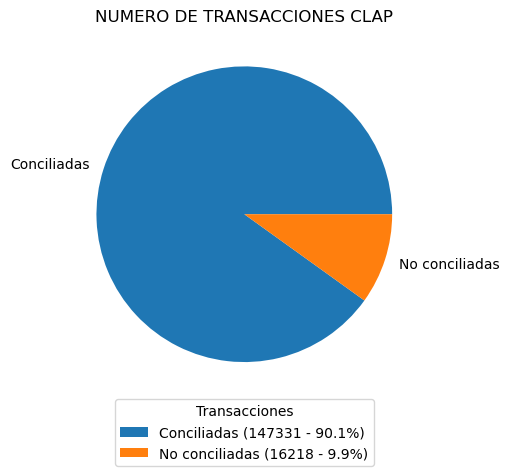

In [204]:
data = {'Transacciones': ['Conciliadas', 'No conciliadas'],
        'Cantidad': [transacciones_conciliadas_cp, total_transacciones_general_cp - transacciones_conciliadas_cp]}
df = pd.DataFrame(data)
total_transacciones = df['Cantidad'].sum()
plt.pie(df['Cantidad'], labels=df['Transacciones'])
plt.title('NUMERO DE TRANSACCIONES CLAP')
leyenda_cp = [f'{t} ({c} - {c/total_transacciones*100:.1f}%)' for t, c in zip(df['Transacciones'], df['Cantidad'])]
plt.legend(leyenda_cp, title='Transacciones', loc='lower center', bbox_to_anchor=(0.5, -0.2))
plt.show()


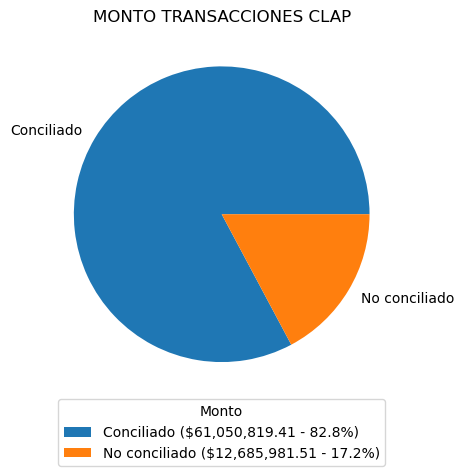

In [221]:
locale.setlocale(locale.LC_ALL, '')

data = {'Monto': ['Conciliado', 'No conciliado'],
        'Cantidad': [monto_conciliado_cp, total_general_cp - monto_conciliado_cp]}

df = pd.DataFrame(data)
total_monto = df['Cantidad'].sum()
plt.pie(df['Cantidad'], labels=df['Monto'])
plt.title('MONTO TRANSACCIONES CLAP')
leyenda = [f'{m} ({locale.currency(c, grouping=True)} - {c/total_monto*100:.1f}%)' for m, c in zip(df['Monto'], df['Cantidad'])]
plt.legend(leyenda, title='Monto', loc='lower center', bbox_to_anchor=(0.5, -0.2))
plt.show()


R/ La respuesta se basa en el siguiente criterio "Simetrik considera una partida como conciliable toda aquella transacción cuyo último estado en la base de datos ordenada por fecha y hora sea PAGADA"

<h3>2. Escriba el código de SQL que le permite conocer el monto y la cantidad de las transacciones que SIMETRIK considera como conciliables para la base de BANSUR</h3>

Estado general

In [175]:
cursor_bansur.execute("SELECT DISTINCT TIPO_TRX FROM bansur");
estados_bansur = cursor_bansur.fetchall()
print(estados_bansur)

[('PAGO',), ('CANCELACION',)]


Estado conciliación

In [178]:
PAGADO_BANSUR = str(estados_bansur[0][0])
print(PAGADO_BANSUR)

PAGO


Monto total de transacciones conciliadas bansur

In [193]:
cursor_bansur.execute(f"SELECT SUM(MONTO) FROM bansur WHERE TIPO_TRX = '{PAGADO_BANSUR}'");
monto_conciliado_bansur = cursor_bansur.fetchall()[0][0]
print(monto_conciliado_bansur)

54053911.940


Monto total de transacciones

In [194]:
cursor_bansur.execute(f"SELECT SUM(MONTO) FROM bansur");
total_general_bansur = cursor_bansur.fetchall()[0][0]
print(total_general_bansur)

53977030.030


In [292]:
cursor_bansur.execute("SELECT DISTINCT TR_CRUZADA FROM bansur");
estados_bansur = cursor_bansur.fetchall()
print(estados_bansur)

[(None,), (0,)]


Al identificar que el monto total conciliado es mayor que el monto general se procede a validar la causa, se encuentra que los valores de cancelación resta sobre el total general

In [196]:
cursor_bansur.execute(f"SELECT SUM(MONTO) FROM bansur WHERE TIPO_TRX = '{estados_bansur[1][0]}'");
cancelaciones_bansur = cursor_bansur.fetchall()[0][0]
print(cancelaciones_bansur)

-76881.910


Transacciones conciliadas

In [199]:
cursor_bansur.execute(f"SELECT COUNT(MONTO) FROM bansur WHERE TIPO_TRX = '{PAGADO_BANSUR}'");
transacciones_conciliadas_bansur = cursor_bansur.fetchall()[0][0]
print(transacciones_conciliadas_bansur )

132338


Transacciones generales

In [295]:
cursor_bansur.execute(f"SELECT COUNT(MONTO) FROM bansur");
transacciones_generales_bansur = cursor_bansur.fetchall()[0][0]
print(transacciones_generales_bansur)

132396


<h3>Respuesta</h3>

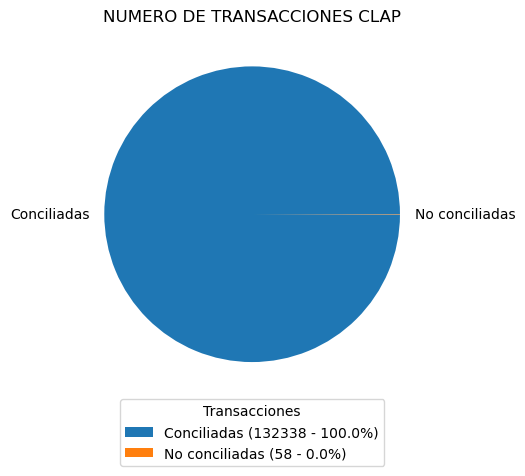

In [222]:
data_t_bansur = {'Transacciones': ['Conciliadas', 'No conciliadas'],
        'Cantidad': [transacciones_conciliadas_bansur, transacciones_generales_bansur 
                     - transacciones_conciliadas_bansur]}

df_t_bansur = pd.DataFrame(data_t_bansur)

total_transacciones_t_bansur = df_t_bansur['Cantidad'].sum()

plt.pie(df_t_bansur['Cantidad'], labels=df_t_bansur['Transacciones'])
plt.title('NUMERO DE TRANSACCIONES CLAP')
leyenda_t_bansur = [f'{t} ({c} - {c/total_transacciones_t_bansur*100:.1f}%)' 
                    for t, c in zip(df_t_bansur['Transacciones'], df_t_bansur['Cantidad'])]
plt.legend(leyenda_t_bansur, title='Transacciones', loc='lower center', bbox_to_anchor=(0.5, -0.2))
plt.show()

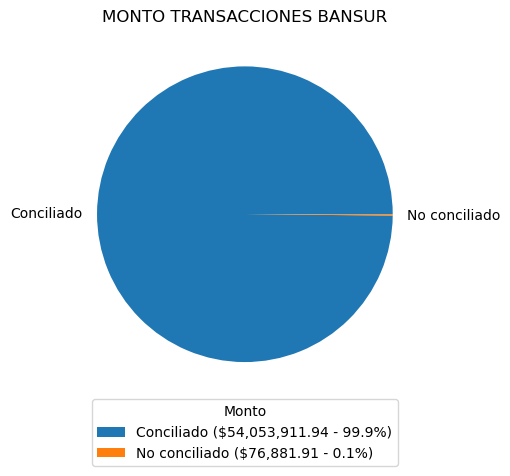

In [239]:
data_m_bansur = {'Monto': ['Conciliado', 'No conciliado'],
        'Cantidad': [ monto_conciliado_bansur, abs(cancelaciones_bansur)]}

df_m_bansur = pd.DataFrame(data_m_bansur)
total_monto_bansur = df_m_bansur['Cantidad'].sum()
plt.pie(df_m_bansur['Cantidad'], labels=df['Monto'])
plt.title('MONTO TRANSACCIONES BANSUR')
leyenda_m_bansur = [f'{m} ({locale.currency(c, grouping=True)} - {c/total_monto_bansur*100:.1f}%)' for m, c in zip(df_m_bansur['Monto'], df_m_bansur['Cantidad'])]
plt.legend(leyenda_m_bansur, title='Monto', loc='lower center', bbox_to_anchor=(0.5, -0.2))
plt.show()

<h3>3. ¿Cómo se comparan las cifras de los puntos anteriores respecto de las cifras totales en las fuentes desde un punto de vista del negocio?</h3>

Las cifras tanto de las transacciones como de los montos totales permiten conocer dos puntos principales, el de la eficiencia del sistema y el del comportamiento del proceso de pagos y la liquidación bancaria, por tanto la comparativa entre ambas ayuda conocer de manera precisa el movimiento transaccional de los registros 

<h3>4. Teniendo en cuenta los criterios de cruce entre ambas bases conciliables, escriba una sentencia de SQL que contenga la información de CLAP y BANSUR; agregue una columna en la que se evidencie si la transacción cruzó o no con su contrapartida y una columna en la que se inserte un ID autoincremental para el control de la conciliación</h3>

Creación de columna de evidencia de cruce

In [248]:
cursor_bansur.execute(f"ALTER TABLE bansur ADD TR_CRUZADA BOOLEAN DEFAULT NULL");

In [252]:
cursor_clap.execute(f"ALTER TABLE clap ADD TR_CRUZADA BOOLEAN DEFAULT NULL");

QUERY USADO PARA VALIDAR CONCILIACIONES EN AMBAS TABLAS

In [263]:
UPDATE bprosys.bansur
JOIN clap.clap ON bprosys.bansur.CODIGO_AUTORIZACION = clap.clap.CODIGO_AUTORIZACION
SET bprosys.bansur.TR_CRUZADA = CASE
    WHEN bprosys.bansur.CODIGO_AUTORIZACION = clap.clap.CODIGO_AUTORIZACION
        AND SUBSTRING(bprosys.bansur.TARJETA, -4) = clap.clap.FINAL4_TARJETA
        AND SUBSTRING(bprosys.bansur.TARJETA, 1, 6) = clap.clap.INICIO6_TARJETA
        AND (ABS(bprosys.bansur.MONTO - clap.clap.MONTO) <= 0.99 OR bprosys.bansur.MONTO = clap.clap.MONTO)
        AND DATE(bprosys.bansur.FECHA_TRANSACCION) = DATE(clap.clap.FECHA_TRANSACCION)
        THEN 'true'
    ELSE 'false'
    END,
    clap.clap.TR_CRUZADA = CASE
    WHEN bprosys.bansur.CODIGO_AUTORIZACION = clap.clap.CODIGO_AUTORIZACION
        AND SUBSTRING(bprosys.bansur.TARJETA, -4) = clap.clap.FINAL4_TARJETA
        AND SUBSTRING(bprosys.bansur.TARJETA, 1, 6) = clap.clap.INICIO6_TARJETA
        AND (ABS(bprosys.bansur.MONTO - clap.clap.MONTO) <= 0.99 OR bprosys.bansur.MONTO = clap.clap.MONTO)
        AND DATE(bprosys.bansur.FECHA_TRANSACCION) = DATE(clap.clap.FECHA_TRANSACCION)
        THEN 'true'
    ELSE 'false'
    END
WHERE clap.clap.TIPO_TRX = 'PAGADA' AND bprosys.bansur.TIPO_TRX = 'PAGO';

Se ejecua el query anteriormente mensionado

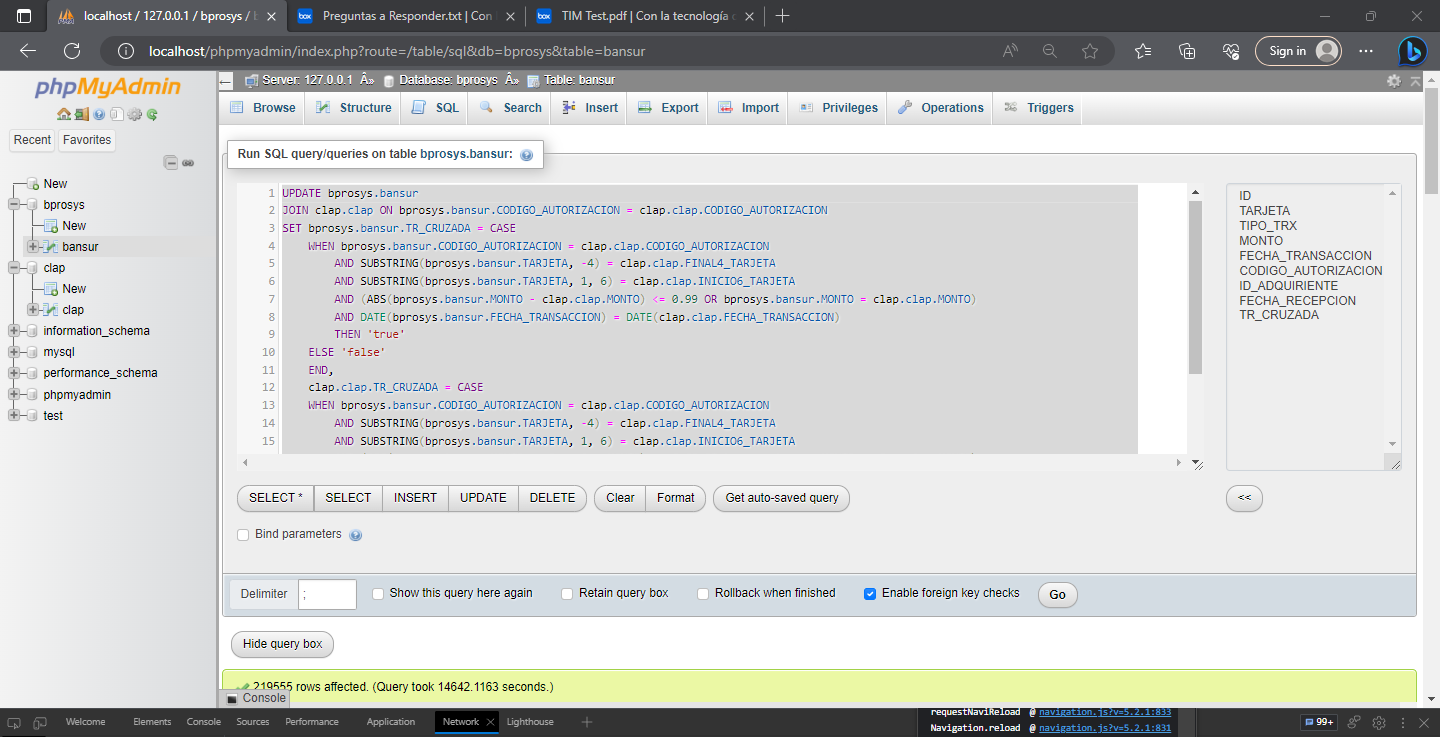

El query es exitoso, pues se identifican aquellas transacciones que son conciliadas pero NO se encuentran cruzadas entre ambas tablas

TRANSACCIONES CRUZADAS Y NO CRUZADAS CLAP

In [327]:
cursor_clap.execute(f"SELECT COUNT(MONTO) FROM clap WHERE TIPO_TRX = '{PAGADO_CLAP}' AND TR_CRUZADA IS NULL");
conciliadas_cruzadas_clap = cursor_clap.fetchall()[0][0]

cursor_clap.execute(f"SELECT COUNT(MONTO) FROM clap WHERE TIPO_TRX = '{PAGADO_CLAP}' AND TR_CRUZADA IS NOT NULL");
conciliadas__no_cruzadas_clap = cursor_clap.fetchall()[0][0]

print('Conciliadas cruzada: ',conciliadas_cruzadas_clap)
print('Conciliadas NO cruzada: ',conciliadas__no_cruzadas_clap )
print('Total conciliaciones', transacciones_conciliadas_cp)

Conciliadas cruzada:  35107
Conciliadas NO cruzada:  112224
Total conciliaciones 147331


TRANSACCIONES CRUZADAS Y NO CRUZADAS BANSUR

In [336]:
cursor_bansur.execute(f"SELECT COUNT(MONTO) FROM bansur WHERE TIPO_TRX = '{PAGADO_BANSUR}' AND TR_CRUZADA IS NULL");
conciliadas_cruzadas_bansur = cursor_bansur.fetchall()[0][0]

cursor_bansur.execute(f"SELECT COUNT(MONTO) FROM bansur WHERE TIPO_TRX = '{PAGADO_BANSUR}' AND TR_CRUZADA IS NOT NULL");
conciliadas__no_cruzadas_bansur = cursor_bansur.fetchall()[0][0]

print('Conciliadas cruzada: ',conciliadas_cruzadas_bansur)
print('Conciliadas NO cruzada: ',conciliadas__no_cruzadas_bansur)
print('Total conciliaciones', transacciones_generales_bansur)

Conciliadas cruzada:  25007
Conciliadas NO cruzada:  107331
Total conciliaciones 132396


<h3>5. Diseñe un código que calcule el porcentaje de transacciones de la base conciliable de CLAP cruzó contra la liquidación de BANSUR.</h3>

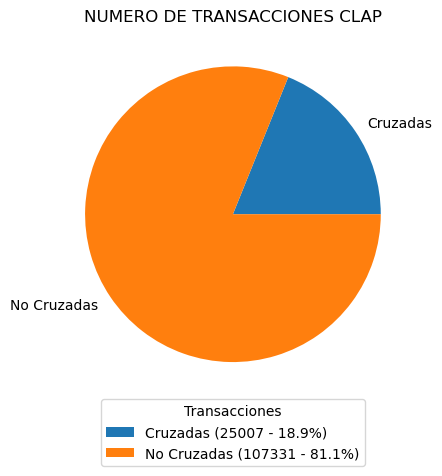

In [343]:
data_t_p_bansur = {'Transacciones': ['Cruzadas', 'No Cruzadas'],
        'Cantidad': [conciliadas_cruzadas_bansur, conciliadas__no_cruzadas_bansur]}

df_t_p_bansur = pd.DataFrame(data_t_p_bansur)

total_transacciones_p_bansur = df_t_p_bansur['Cantidad'].sum()

plt.pie(df_t_p_bansur['Cantidad'], labels=df_t_p_bansur['Transacciones'])
plt.title('NUMERO DE TRANSACCIONES CLAP')
leyenda_p_bansur = [f'{t} ({c} - {c/total_transacciones_p_bansur*100:.1f}%)' 
                    for t, c in zip(df_t_p_bansur['Transacciones'], df_t_p_bansur['Cantidad'])]
plt.legend(leyenda_p_bansur, title='Transacciones', loc='lower center', bbox_to_anchor=(0.5, -0.2))
plt.show()

<h3>6. Diseñe un código que calcule el porcentaje de transacciones de la base conciliable de BANSUR no cruzó contra la liquidación de CLAP.</h3>

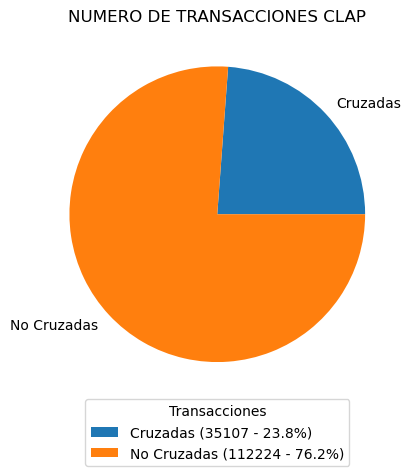

In [342]:
data_t_p_clap = {'Transacciones': ['Cruzadas', 'No Cruzadas'],
        'Cantidad': [conciliadas_cruzadas_clap, conciliadas__no_cruzadas_clap]}

df_t_p_clap = pd.DataFrame(data_t_p_clap)

total_transacciones_p_clap = df_t_p_clap['Cantidad'].sum()

plt.pie(df_t_p_clap['Cantidad'], labels=df_t_p_clap['Transacciones'])
plt.title('NUMERO DE TRANSACCIONES CLAP')
leyenda_p_clap = [f'{t} ({c} - {c/total_transacciones_p_clap*100:.1f}%)' 
                    for t, c in zip(df_t_p_clap['Transacciones'], df_t_p_clap['Cantidad'])]
plt.legend(leyenda_p_bansur, title='Transacciones', loc='lower center', bbox_to_anchor=(0.5, -0.2))
plt.show()